<div dir="rtl">
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>
</div>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
 در این تمرین قصد داریم با دانسته‌های خود تا اینجای فصل، به بهبود روشنایی و کنتراست تصاویر بپردازیم.
    </font>
    </p>
    
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    درپایان تمرین با مفاهیم زیر به صورت عملی کار خواهیم کرد:
    </font>
    </p>
    
<div dir="rtl">    
    
+ **بازکردن و خواندن فایل**
+ **رسم هیستوگرام تصویر**
+ **بهبود روشنایی با روش خطی و غیر خطی**
+ **بهبود کنتراست با روش های معرفی شده**
    </div>

<details class='green'>
    <summary>
        <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
        <font face="vazir" size=3>
            نصب کتابخانه‌ها
            </font>
        </p>
    </summary>
    
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
    <font face="vazir" size=3>
        اگر کتابخانه‌های زیر را در سیستم خود ندارید، می‌توانید با اجرای دستورات زیر آن‌ها در سیستم خود نصب کنید.
    </font>
</p>

```python
!pip install opencv-python
!pip install numpy==1.16
!pip install pandas
```
</details>

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

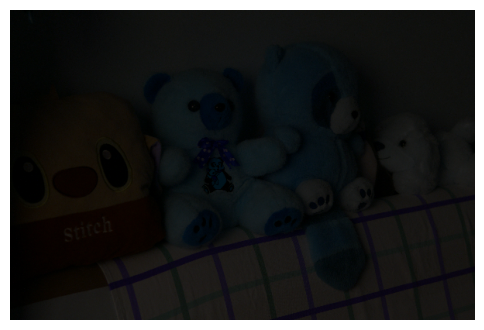

In [12]:
# read the data to work on
image = cv2.imread("../data/dolls.png")

# show image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
رسم هیستوگرام تصویر
</font>
</h2>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
همیشه برای داشتن اطلاعات بیشتر از تصویر، بهتر است هیستوگرام آن را رسم کنیم. برای رسم هیستوگرام تصاویر رنگی، روش عمده به این صورت است که سه کانال قرمز، سبز و آبی را از هم جدا کرده و هیستوگرام هر کانال را بصورت جداگانه رسم میکنیم. در این قسمت از تمرین هم میتوانید با استفاده از متد <code>cv2.split</code> کانال های رنگی تصویر را  جدا کنید. البته از آنجا که OpenCV به‌طور پیش‌فرض تصاویر را در فضای رنگی BGR می‌خواند، باید ابتدا تصویر را به فرمت RGB تبدیل کنیم.
    </font>
    </p>

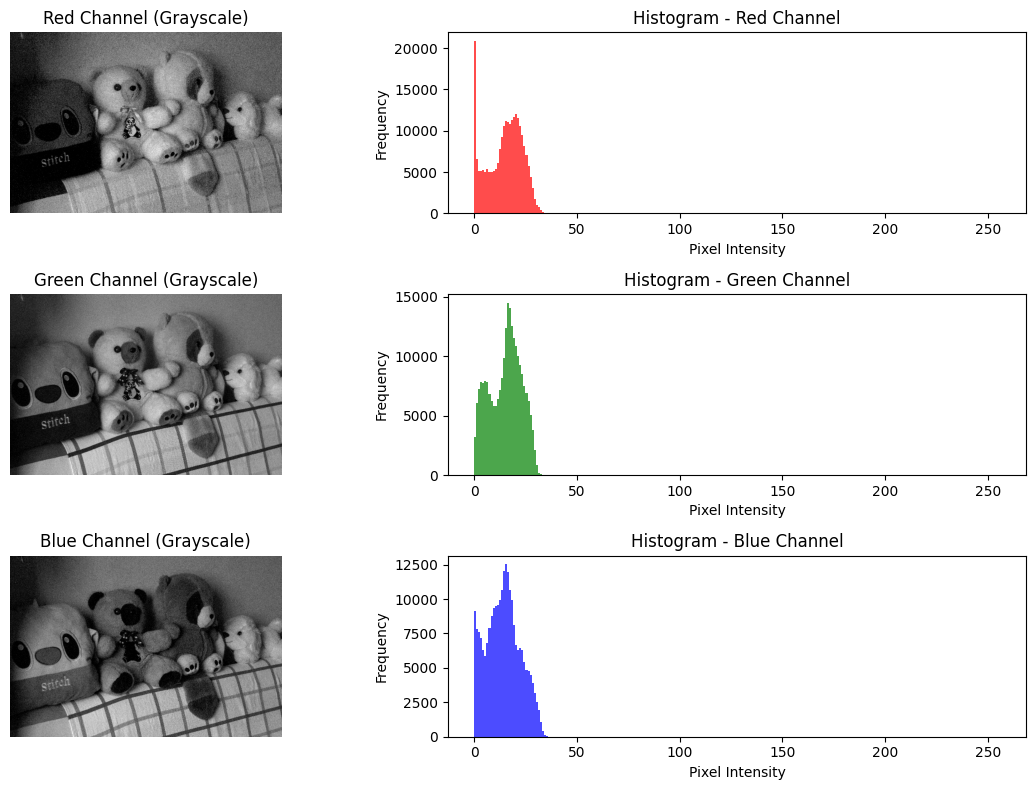

In [13]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# split RGB channels using cv2.split 
R , G, B = cv2.split(image_rgb)

# plot r, g, b histograms using matplotlib 
plt.figure(figsize=(12, 8))

# Plot the Red Channel
plt.subplot(3, 2, 1)
plt.imshow(R, cmap="gray")
plt.title("Red Channel (Grayscale)")
plt.axis("off")

# Plot the Red Hist
plt.subplot(3, 2, 2)
plt.hist(R.ravel(), bins=256, range=[0, 256], color="red", alpha=0.7)
plt.title("Histogram - Red Channel")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Plot the Green Channel
plt.subplot(3, 2, 3)
plt.imshow(G, cmap="gray")
plt.title("Green Channel (Grayscale)")
plt.axis("off")

# Plot the Green Hist
plt.subplot(3, 2, 4)
plt.hist(G.ravel(), bins=256, range=[0, 256], color="green", alpha=0.7)
plt.title("Histogram - Green Channel")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Plot the Blue Channel
plt.subplot(3, 2, 5)
plt.imshow(B, cmap="gray")
plt.title("Blue Channel (Grayscale)")
plt.axis("off")

# Plot the Blue Hist
plt.subplot(3, 2, 6)
plt.hist(B.ravel(), bins=256, range=[0, 256], color="blue", alpha=0.7)
plt.title("Histogram - Blue Channel")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Show Plots
plt.tight_layout()
plt.show()


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بهبود روشنایی تصویر
</font>
</h2>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
همانطور که از ظاهر تصویر و هیستوگرام آن پیداست، تصویر ما یک تصویر بیش از حد تاریک است که باید به کمک تکنیک های پردازش تصویر، روشنایی آن را به حد قابل قبول برسانیم. ساده ترین راهکار استفاده از تبدیلات خطی است. در سلول زیر با استفاده از تبدیل روشنایی خطی، 50 واحد به شدت روشنایی هر پیکسل اضافه کنید و در نهایت تصویر را نمایش دهید.
    </font>
    </p>

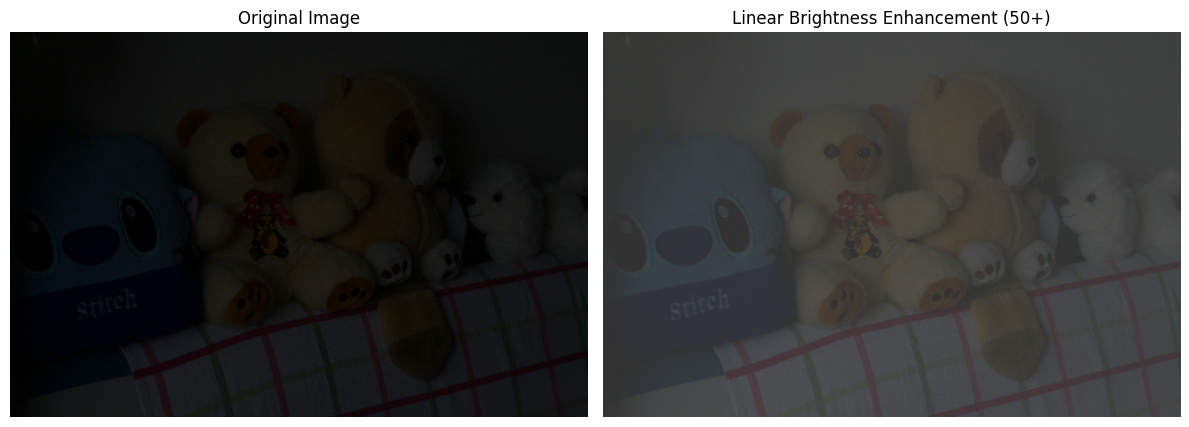

In [14]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
brightness_increase = 50

brightened_image = np.clip(image_rgb + brightness_increase, 0, 255)


# show the original image and the brightened_image in one figure
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.axis("off")
plt.imshow(image_rgb)

plt.subplot(1,2,2)
plt.title(f"Linear Brightness Enhancement ({brightness_increase}+)")
plt.axis("off")
plt.imshow(brightened_image)

plt.tight_layout()
plt.show()

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در سلول پایین هیستوگرام تصویر پردازش شده سلول قبل را رسم کنید و با یکدیگر مقایسه کنید.
    </font>
    </p>

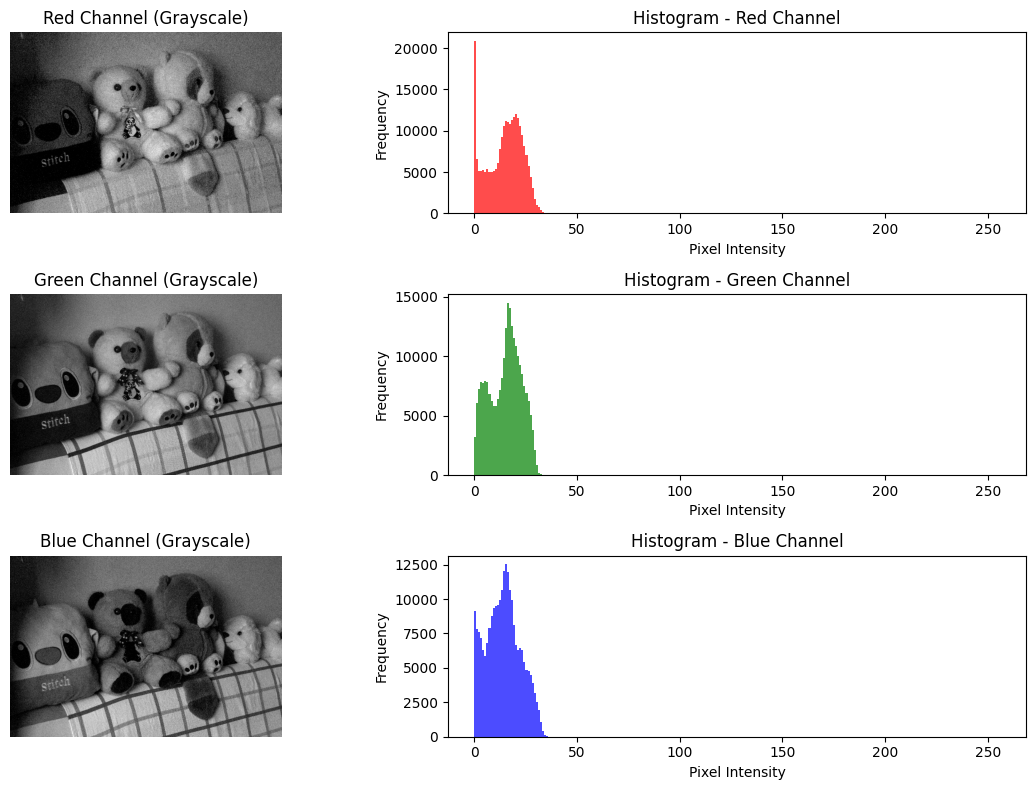

In [15]:
image_rgb = cv2.cvtColor(brightened_image, cv2.COLOR_BGR2RGB)

# split RGB channels using cv2.split
r, g, b = cv2.split(image_rgb)

# plot r, g, b histograms using matplotlib or any other libraries
plt.figure(figsize=(12, 8))

# Plot the Red Channel
plt.subplot(3, 2, 1)
plt.imshow(R, cmap="gray")
plt.title("Red Channel (Grayscale)")
plt.axis("off")

# Plot the Red Hist
plt.subplot(3, 2, 2)
plt.hist(R.ravel(), bins=256, range=[0, 256], color="red", alpha=0.7)
plt.title("Histogram - Red Channel")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Plot the Green Channel
plt.subplot(3, 2, 3)
plt.imshow(G, cmap="gray")
plt.title("Green Channel (Grayscale)")
plt.axis("off")

# Plot the Green Hist
plt.subplot(3, 2, 4)
plt.hist(G.ravel(), bins=256, range=[0, 256], color="green", alpha=0.7)
plt.title("Histogram - Green Channel")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Plot the Blue Channel
plt.subplot(3, 2, 5)
plt.imshow(B, cmap="gray")
plt.title("Blue Channel (Grayscale)")
plt.axis("off")

# Plot the Blue Hist
plt.subplot(3, 2, 6)
plt.hist(B.ravel(), bins=256, range=[0, 256], color="blue", alpha=0.7)
plt.title("Histogram - Blue Channel")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Show Plots
plt.tight_layout()
plt.show()

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
مشخص است که روش خطی خیلی تاثیری در بالا بردن کیفیت تصویر و روشنایی نداشته است. بنابراین سراغ روش های غیر خطی مثل اصلاح گاما میرویم. در سلول زیر تصویر را به کمک اصلاح گاما، روشنایی اش را بهبود دهید. یادآوری میشود که اگر مقدار گاما بزرگتر از 1 باشد تصویر تاریک تر میشود و اگر کوچکتر، رنگ های تصویر باز تر یا روشن تر میشود.
    </font>
    </p>

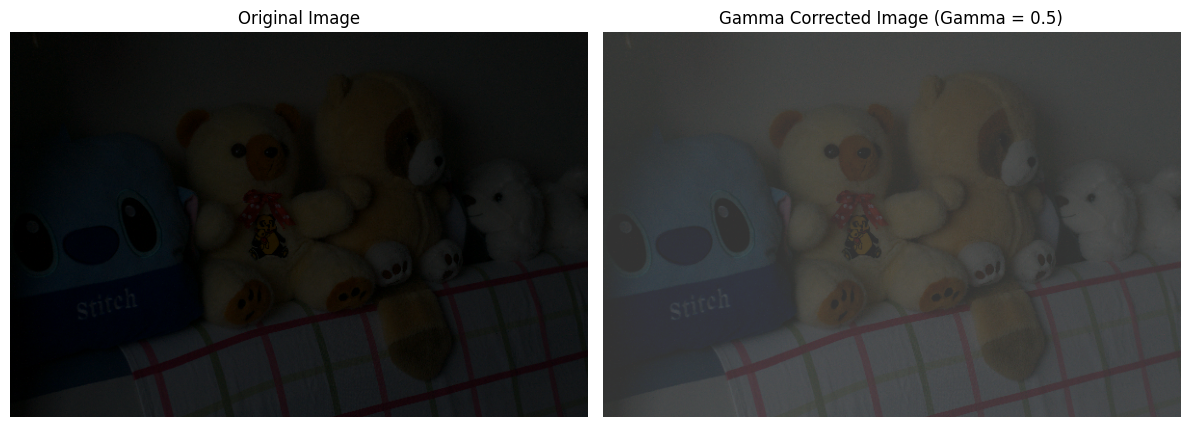

In [16]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# set the gamma parameters for example 0.5
gamma = 0.5

normalized_image = image_rgb / 255

# store the corrected image in gamma_corrected variable
gamma_corrected = np.power(normalized_image, gamma)
gamma_corrected = (gamma_corrected * 255).astype(np.uint8)


# show the original image and the gamma_corrected in one figure
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.axis("off")
plt.imshow(image_rgb)

plt.subplot(1, 2, 2)
plt.title(f"Gamma Corrected Image (Gamma = {gamma})")
plt.axis("off")
plt.imshow(brightened_image)

plt.tight_layout()
plt.show()

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
حال هیستوگرام تصویر اصلاح شده به کمک روش گاما را رسم کنید و با هیستوگرام تصویر اصلی مقایسه کنید.
    </font>
    </p>

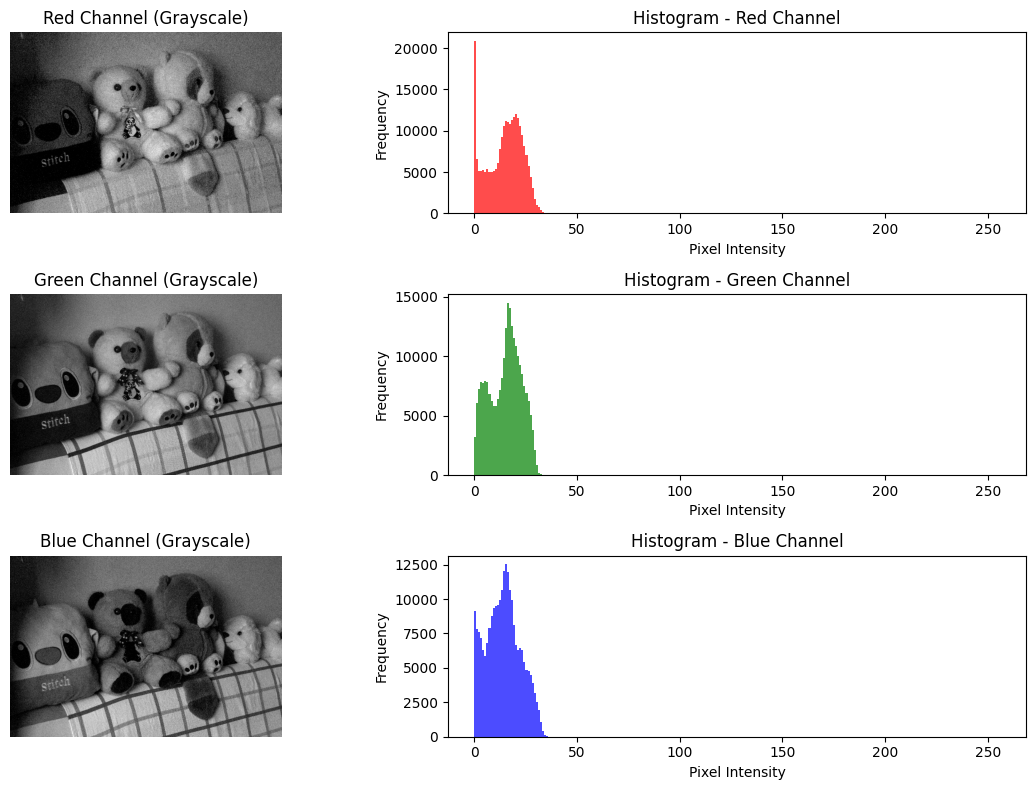

In [17]:
image_rgb = cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB)

# split RGB channels using cv2.split
r , g, b = cv2.split(image_rgb)

# plot r, g, b histograms using matplotlib or any other libraries
plt.figure(figsize=(12, 8))

# Plot the Red Channel
plt.subplot(3, 2, 1)
plt.imshow(R, cmap="gray")
plt.title("Red Channel (Grayscale)")
plt.axis("off")

# Plot the Red Hist
plt.subplot(3, 2, 2)
plt.hist(R.ravel(), bins=256, range=[0, 256], color="red", alpha=0.7)
plt.title("Histogram - Red Channel")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Plot the Green Channel
plt.subplot(3, 2, 3)
plt.imshow(G, cmap="gray")
plt.title("Green Channel (Grayscale)")
plt.axis("off")

# Plot the Green Hist
plt.subplot(3, 2, 4)
plt.hist(G.ravel(), bins=256, range=[0, 256], color="green", alpha=0.7)
plt.title("Histogram - Green Channel")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Plot the Blue Channel
plt.subplot(3, 2, 5)
plt.imshow(B, cmap="gray")
plt.title("Blue Channel (Grayscale)")
plt.axis("off")

# Plot the Blue Hist
plt.subplot(3, 2, 6)
plt.hist(B.ravel(), bins=256, range=[0, 256], color="blue", alpha=0.7)
plt.title("Histogram - Blue Channel")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Show Plots
plt.tight_layout()
plt.show()

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
مشخص است. روشنایی تصویر بهبود یافته ولی همچنان کیفیت تصویر میتواند بهتر شود. ایده دیگر این است که ابتدا کنتراست تصویر را بهبود داد و سپس اقدام به بهبود روشنایی تصویر پرداخت. راهبرد میتواند این باشد که ابتدا به کمک روش کشش هیستوگرام بازه شدت روشنایی ها را گسترش دهیم و سپس به کمک اصلاح گاما پردازش نهایی را روی تصویر انجام دهیم.
    </font>
    </p>

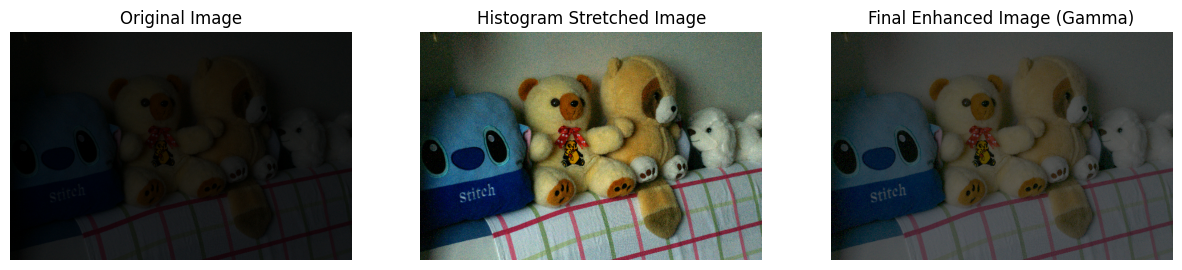

In [18]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# A function to stretching the histogram of Channels
def histogram_stretching(channel):
    min_val = np.min(channel)
    max_val = np.max(channel)
    stretched = (channel - min_val) * (255 / (max_val - min_val))
    return np.uint8(stretched)


# split the channels as you did before
r, g, b = cv2.split(image_rgb)

# make histogram_stretching for each channel
r_stretched = histogram_stretching(r)
g_stretched = histogram_stretching(g)
b_stretched = histogram_stretching(b)

# merge stretched channels
image_stretched = cv2.merge([r_stretched, g_stretched, b_stretched])

# Gamma correction after histogram stretching
# make sure to store image in image_gamma
gamma = 0.5
normalized_image = image_rgb / 255
image_gamma = np.power(normalized_image, gamma)
image_gamma = (image_gamma * 255).astype(np.uint8)


# show the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(image_stretched)
plt.title("Histogram Stretched Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(image_gamma)
plt.title("Final Enhanced Image (Gamma)")
plt.axis("off")

plt.show()

<div dir="rtl">
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>
</div>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [19]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)
            

cv2.imwrite('image_gamma.png', image_gamma)
file_names = [ 'image_gamma.png', 'code.ipynb']
compress(file_names)

File Paths:
['image_gamma.png', 'code.ipynb']
